In [1]:
"Ce fichier permet de simuller une antenne ifa avec les parametres optimisés obtenue du script ifa_meander_optimize.py"

'Ce fichier permet de simuller une antenne ifa avec les parametres optimisés obtenue du script ifa_meander_optimize.py'

In [2]:
from utils.ifa_meander_project_v2.geometry import *
from utils.ifa_meander_project_v2.meshing import *
from utils.ifa_meander_project_v2.frequency import *
from utils.ifa_meander_project_v2.simulation import *
from src.scattering_algorithm.scattering_algorithm import *
from efield.efield2 import radiation_intensity_distribution_over_sphere_surface
from efield.efield3 import antenna_directivity_pattern

In [3]:
fLow = 700e6
fHigh = 1000e6
fC = 868e6
step = 4e6

frequencies, fc_index, nPoints = generate_frequencies(fLow, fHigh, fC, step)

print(f"Nombre de fréquences (nPoints) : {nPoints}")
print(f"Index de fC : {fc_index}")


Nombre de fréquences (nPoints) : 76
Index de fC : 42


In [4]:
mesh_name = "sim_optimize_ifa_scattering.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/sim_optimize_ifa_scattering.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [5]:
a = 27 / 1000  # Largeur
b = 55 / 1000  # Hauteur

terminal_a = 92 / 1000
terminal_b = b
x_t = np.array([-terminal_a + a, 0, 0, -terminal_a + a])
y_t = np.array([terminal_b, terminal_b, 0, 0])

# On fixe le short feed et la largur de piste
largeur_piste    = 5.400 / 1000
distance_meandre = 8.100 / 1000
feed = 31.239 / 1000  
feed_point       = [0, feed, 0]

mesh_size = 15 / 1000

In [6]:
wave_incident_direction = np.array([0, 0, -1])
polarization=np.array([0, 1, 0])

In [7]:
def creation_ifa(largeur, hauteur, width, dist_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name, mesh_size):
    x, y, N, distance_meandre = ifa_creation(largeur, hauteur, width, dist_meandre)
    x_m, y_m = trace_meander(x, y, width)
    feed_wid = width # La largeur de la piste est la meme partout
    feed_x = np.array([0, distance_meandre, distance_meandre, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, mesh_size)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
    return N, distance_meandre

In [8]:
print(f"distance meandres {distance_meandre * 1000} mm")
print(f"Largeur de piste ifa {largeur_piste * 1000} mm")
print(f"position feed = {feed * 1000} mm\n")
N_list_elem, new_distance_meandre_elem = creation_ifa(a, b, largeur_piste, distance_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name, mesh_size)
print(f"Number of meanders {N_list_elem}")
print(f"New distance meandres {new_distance_meandre_elem * 1000} mm")

import time
start_time = time.time()
scattering_algorithm(ifa_meander_mat, fC, wave_incident_direction, polarization)
elapsed_time = time.time() - start_time
print(f"\nTemps écoulé pour le traitement de l'antenne étudiée : {elapsed_time:.6f} secondes")
print('\n')

distance meandres 8.1 mm
Largeur de piste ifa 5.4 mm
position feed = 31.239 mm

Number of meanders 2
New distance meandres 8.1 mm
length of antenna sim_optimize_ifa_scattering = 0.092 meter
width of antenna sim_optimize_ifa_scattering = 0.055 meter
height of antenna sim_optimize_ifa_scattering = 0.0 meter


Nombre d'elements de maillage (edges) = 99


Sauvegarde du fichier : sim_optimize_ifa_scattering_current.mat effectué avec succès !

Fréquence de l'onde incidente : 868000000.0 Hz

sim_optimize_ifa_scattering antenna surface current in receiving mode view is successfully created at frequency 868000000.0 Hz



Temps écoulé pour le traitement de l'antenne étudiée : 0.164007 secondes




Calculating radiation intensity distribution over sphere surface...

Frequency = 868000000.0 Hz
Longueur d'onde lambda = 0.34533681334171573 m

Total Power :  0.000001
Gain Linear :  1.625169
Gain Logarithmic :  2.108987 dB
Data saved successfully to data/antennas_gain_power/sim_optimize_ifa_scattering_gain_power.mat


Generating antenna directivity pattern...
Data loaded from data/antennas_gain_power/sim_optimize_ifa_scattering_gain_power.mat


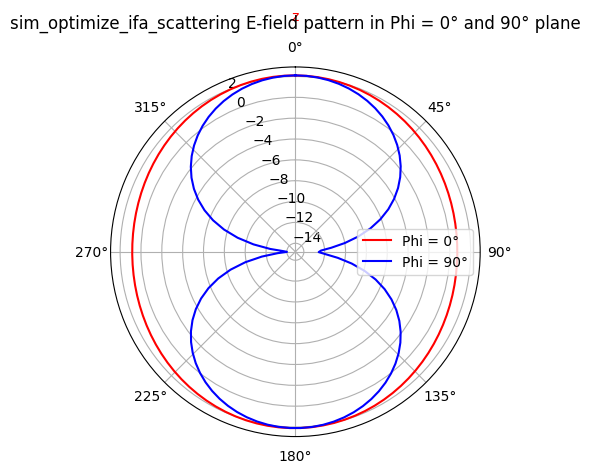

In [9]:
ifa_mesh2 = 'data/antennas_mesh2/sim_optimize_ifa_scattering_mesh2.mat'
ifa_current = 'data/antennas_current/sim_optimize_ifa_scattering_current.mat'
ifa_gain_power = 'data/antennas_gain_power/sim_optimize_ifa_scattering_gain_power.mat'
filename_sphere_dense = '../../data/sphere_mesh/sphere_dense.mat'

# Étape 2 : Distribution de l'intensité du rayonnement sur une sphère
print("Calculating radiation intensity distribution over sphere surface...")
radiation_intensity_distribution_over_sphere_surface(ifa_mesh2, ifa_current, filename_sphere_dense, scattering=True)

# Étape 3 : Génération du diagramme de directivité
print("Generating antenna directivity pattern...")
antenna_directivity_pattern(ifa_mesh2, ifa_current, ifa_gain_power, scattering=True)